<a href="https://colab.research.google.com/github/ommnnitald/DiamondPricePrediction/blob/main/aivot_deep_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dropout(0.5),
layers.Dense(16, activation="relu"),
layers.Dropout(0.5),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history_dropout = model.fit(
train_data, train_labels,
epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
1/1 [==============================] - 1s 829ms/step - loss: 5.3261 - accuracy: 0.0207 - val_loss: 3.6741 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 26ms/step - loss: 5.5697 - accuracy: 0.0207 - val_loss: 3.1827 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 25ms/step - loss: 3.7453 - accuracy: 0.0165 - val_loss: 2.8171 - val_accuracy: 0.0062
Epoch 4/20
1/1 [==============================] - 0s 37ms/step - loss: 3.7777 - accuracy: 0.0289 - val_loss: 2.4657 - val_accuracy: 0.0062
Epoch 5/20
1/1 [==============================] - 0s 26ms/step - loss: 2.5782 - accuracy: 0.0207 - val_loss: 2.1973 - val_accuracy: 0.0062
Epoch 6/20
1/1 [==============================] - 0s 27ms/step - loss: 4.5101 - accuracy: 0.0083 - val_loss: 1.9356 - val_accuracy: 0.0062
Epoch 7/20
1/1 [==============================] - 0s 26ms/step - loss: 4.4063 - accuracy: 0.0124 - val_loss: 1.6853 - val_accuracy: 0.0185
Epoch 8/20
1/1 [==

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 41ms/step - loss: 0.5194 - accuracy: 0.7885 - val_loss: 0.3980 - val_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3073 - accuracy: 0.9021 - val_loss: 0.3066 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2263 - accuracy: 0.9268 - val_loss: 0.2816 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1767 - accuracy: 0.9441 - val_loss: 0.2733 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1431 - accuracy: 0.9555 - val_loss: 0.2876 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1197 - accuracy: 0.9626 - val_loss: 0.3024 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0994 - accuracy: 0.9703 - val_loss: 0.3091 - val_accuracy: 0.8839
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

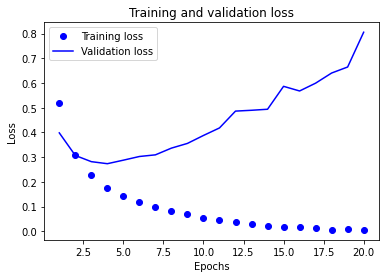

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

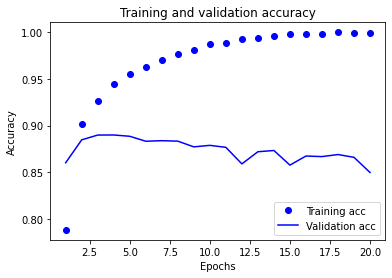

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4576 - accuracy: 0.8220
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2664 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2053 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2971 - accuracy: 0.8810


In [ ]:
results

[0.2970511019229889, 0.8809599876403809]

In [ ]:
model.predict(x_test)

array([[0.17206852],
       [0.9993538 ],
       [0.64147395],
       ...,
       [0.11926585],
       [0.06517687],
       [0.5251409 ]], dtype=float32)

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])


565248/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])


In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.6894 - accuracy: 0.5390 - val_loss: 1.7873 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4287 - accuracy: 0.7135 - val_loss: 1.3041 - val_accuracy: 0.7320
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0482 - accuracy: 0.7810 - val_loss: 1.1617 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8263 - accuracy: 0.8274 - val_loss: 1.0391 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6667 - accuracy: 0.8627 - val_loss: 0.9710 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5326 - accuracy: 0.8931 - val_loss: 0.9307 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4358 - accuracy: 0.9107 - val_loss: 0.9488 - val_accuracy: 0.7960
Epoch 8/20
16

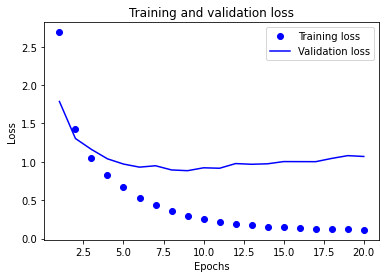

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

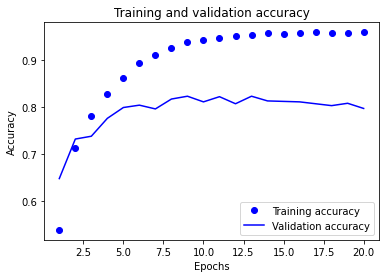

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.5179 - accuracy: 0.5411
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.3262 - accuracy: 0.7218
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 0.9815 - accuracy: 0.7906
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7706 - accuracy: 0.8363
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6074 - accuracy: 0.8739
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4848 - accuracy: 0.9007
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3868 - accuracy: 0.9184
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3162 - accuracy: 0.9314
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9626 - accuracy: 0.7885


In [ ]:
results

[0.9625672698020935, 0.7885128855705261]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


0.188780053428317

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 2.7628 - accuracy: 0.4169 - val_loss: 1.9929 - val_accuracy: 0.5770
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7666 - accuracy: 0.6111 - val_loss: 1.6402 - val_accuracy: 0.6220
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5106 - accuracy: 0.6401 - val_loss: 1.5168 - val_accuracy: 0.6370
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3211 - accuracy: 0.6699 - val_loss: 1.4237 - val_accuracy: 0.6550
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1625 - accuracy: 0.6981 - val_loss: 1.3545 - val_accuracy: 0.6830
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0347 - accuracy: 0.7370 - val_loss: 1.3519 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9367 - accuracy: 0.7519 - val_loss: 1.3221 - val_accuracy: 0.7140
Epoch 8/20
63/63 [==

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.053607225418091, 2.490351676940918, 2.473325729370117, 2.3240926265716553]

In [ ]:
np.mean(all_scores)

2.3353443145751953

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5026 - accuracy: 0.7888 - val_loss: 0.3807 - val_accuracy: 0.8657
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2981 - accuracy: 0.9047 - val_loss: 0.2983 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2197 - accuracy: 0.9276 - val_loss: 0.2851 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1749 - accuracy: 0.9436 - val_loss: 0.2750 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1439 - accuracy: 0.9527 - val_loss: 0.3218 - val_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1173 - accuracy: 0.9635 - val_loss: 0.3272 - val_accuracy: 0.8765
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0986 - accuracy: 0.9710 - val_loss: 0.3106 - val_accuracy: 0.8851
Epoch 8/20
30

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6280 - accuracy: 0.6895 - val_loss: 0.5456 - val_accuracy: 0.8108
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4699 - accuracy: 0.8749 - val_loss: 0.4280 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3589 - accuracy: 0.9051 - val_loss: 0.3568 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2855 - accuracy: 0.9192 - val_loss: 0.3139 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2359 - accuracy: 0.9317 - val_loss: 0.2896 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2011 - accuracy: 0.9392 - val_loss: 0.2829 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1739 - accuracy: 0.9493 - val_loss: 0.3001 - val_accuracy: 0.8757
Epoch 8/20
30

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5434 - accuracy: 0.7629 - val_loss: 0.4854 - val_accuracy: 0.7926
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2620 - accuracy: 0.9006 - val_loss: 0.3031 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1506 - accuracy: 0.9427 - val_loss: 0.5482 - val_accuracy: 0.7976
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1105 - accuracy: 0.9669 - val_loss: 0.3318 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.3135 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0078 - accuracy: 0.9993 - val_loss: 0.5035 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 9.3824e-04 - accuracy: 0.9999 - val_loss: 0.6310 - val_accuracy: 0.8863
Epoch 8/2

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6005 - accuracy: 0.7714 - val_loss: 0.4610 - val_accuracy: 0.8714
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3943 - accuracy: 0.8961 - val_loss: 0.3884 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3265 - accuracy: 0.9156 - val_loss: 0.3722 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2947 - accuracy: 0.9242 - val_loss: 0.3546 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2703 - accuracy: 0.9356 - val_loss: 0.3641 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2602 - accuracy: 0.9374 - val_loss: 0.3627 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2452 - accuracy: 0.9451 - val_loss: 0.3700 - val_accuracy: 0.8808
Epoch 8/20
30

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6483 - accuracy: 0.6107 - val_loss: 0.5544 - val_accuracy: 0.8051
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5478 - accuracy: 0.7337 - val_loss: 0.4589 - val_accuracy: 0.8638
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4730 - accuracy: 0.7992 - val_loss: 0.3883 - val_accuracy: 0.8750
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4213 - accuracy: 0.8417 - val_loss: 0.3448 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3646 - accuracy: 0.8717 - val_loss: 0.3195 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3267 - accuracy: 0.8971 - val_loss: 0.3016 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2909 - accuracy: 0.9153 - val_loss: 0.3013 - val_accuracy: 0.8871
Epoch 8/20
30

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [ ]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

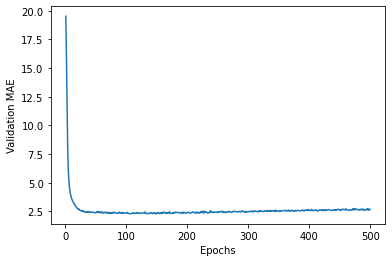

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


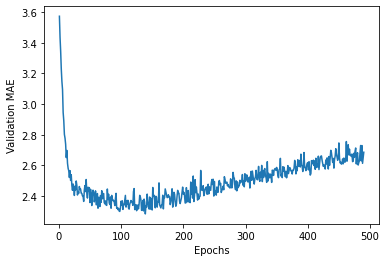

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 14.8552 - mae: 2.5641


In [ ]:
test_mae_score



2.5640952587127686

In [ ]:
predictions = model.predict(test_data)
predictions[0]

array([7.4781737], dtype=float32)